# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd
import numpy as np

## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

In [2]:
# Set the random seed
random_seed = 42

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [3]:
# Read in the training data and targets
training_data = pd.read_csv(training_data_path)
training_targets = pd.read_csv(training_targets_path)

# Join the training data and targets
cancer = training_data.join(training_targets)

# Print the dataframe
cancer

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,59.000000,30,404.300000,33975,8251,20.5,0.000000,51.3,50.8,51.9,...,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436,199.5
1,114.000000,41,403.800000,47363,22702,13.8,0.000000,40.8,39.8,42.7,...,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661,137.1
2,33.000000,11,352.000000,77222,9899,6.8,0.000000,38.1,36.9,39.8,...,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130,126.9
3,254.000000,100,429.600000,80650,48904,7.5,0.000000,43.5,42.7,44.1,...,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462,173.8
4,75.000000,32,407.500000,42839,22255,14.6,0.000000,31.1,30.2,31.6,...,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469,179.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,335.000000,155,445.700000,41608,61109,17.5,32.728403,41.2,39.8,42.0,...,42.4,42.6,23.4,95.398451,2.154399,0.448024,0.106749,49.736708,5.379260,201.5
2434,113.000000,37,497.300000,61259,17299,9.0,0.000000,45.9,44.9,47.3,...,43.6,34.8,19.9,92.609104,3.320038,0.786016,0.997184,53.404362,3.227666,160.0
2435,571.000000,210,457.200000,49790,118212,12.6,676.750245,35.4,34.5,36.3,...,56.5,28.6,13.7,91.484690,1.389174,4.463981,0.651015,47.707412,4.937288,160.0
2436,1962.667684,7,453.549422,50886,2640,10.4,0.000000,47.4,45.3,50.1,...,35.1,32.3,12.6,96.892139,0.987203,0.548446,0.146252,62.436975,8.951965,136.2


In [4]:
# Check for duplicates
cancer.duplicated().sum()

0

In [5]:
# Check for missing values
cancer.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
TARGET_d

## Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features?

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot: title={'center': 'avgAnnCount'}>,
        <AxesSubplot: title={'center': 'avgDeathsPerYear'}>,
        <AxesSubplot: title={'center': 'incidenceRate'}>,
        <AxesSubplot: title={'center': 'medIncome'}>,
        <AxesSubplot: title={'center': 'popEst2015'}>,
        <AxesSubplot: title={'center': 'povertyPercent'}>],
       [<AxesSubplot: title={'center': 'studyPerCap'}>,
        <AxesSubplot: title={'center': 'MedianAge'}>,
        <AxesSubplot: title={'center': 'MedianAgeMale'}>,
        <AxesSubplot: title={'center': 'MedianAgeFemale'}>,
        <AxesSubplot: title={'center': 'AvgHouseholdSize'}>,
        <AxesSubplot: title={'center': 'PercentMarried'}>],
       [<AxesSubplot: title={'center': 'PctNoHS18_24'}>,
        <AxesSubplot: title={'center': 'PctHS18_24'}>,
        <AxesSubplot: title={'center': 'PctSomeCol18_24'}>,
        <AxesSubplot: title={'center': 'PctBachDeg18_24'}>,
        <AxesSubplot: title={'center': 'PctHS25_Over'}>,
        <AxesSubpl

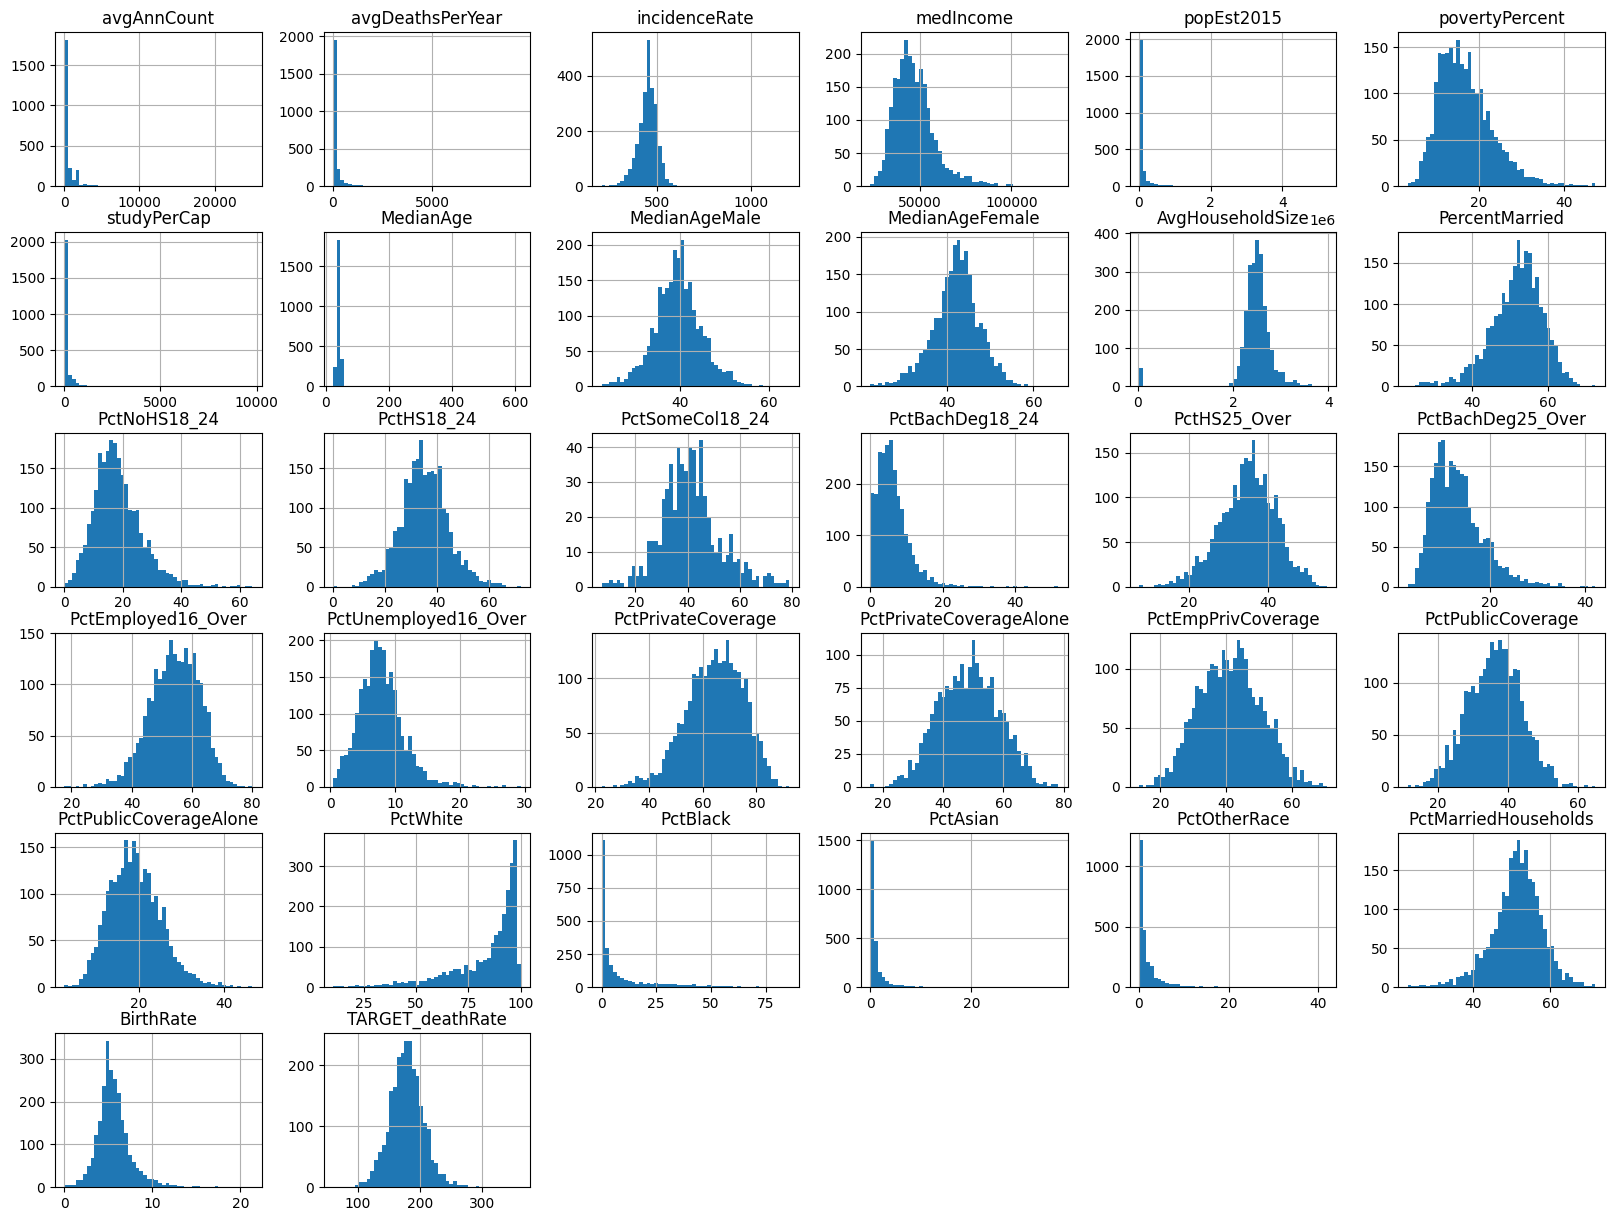

In [7]:
# Plot histograms of all features to visualise their distributions and identify outliers
cancer.hist(bins=50, figsize=(20,15))

#### Histogram Observations:
- MedianAge has some extreme, potentially unrealistic values - in at least one county the median age exceeds 400 years which must be incorrect data
- AvgHouseholdSize has a number of zero or near zero values which implies that most homes in a county are unoccupied
- Some counties have 0% Black, Asian and Other Races which is unlikely given the population of the counties

## Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations.

In [8]:
# Compute the correlations of all features with the target variable
correlations = cancer.corr().abs()
correlations_TARGET = correlations['TARGET_deathRate'].sort_values(ascending=False)
correlations_TARGET

TARGET_deathRate           1.000000
PctBachDeg25_Over          0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                  0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over         0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage         0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone    0.355050
PctMarriedHouseholds       0.290645
PctBachDeg18_24            0.284566
PctHS18_24                 0.266285
PercentMarried             0.266153
PctEmpPrivCoverage         0.259006
PctBlack                   0.236380
PctSomeCol18_24            0.186140
PctOtherRace               0.182602
PctAsian                   0.181948
PctWhite                   0.174521
avgAnnCount                0.150019
popEst2015                 0.130122
avgDeathsPerYear           0.094048
PctNoHS18_24               0.090565
BirthRate                  0.088543
AvgHouseholdSize           0

### Which are the top five features with strongest correlations to the targets?

In [9]:
# Get the top five features with the highest correlation with the target variable
top_five_features = correlations_TARGET[1:6]
top_five_features

PctBachDeg25_Over         0.491411
incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
medIncome                 0.416607
povertyPercent            0.413260
Name: TARGET_deathRate, dtype: float64

Top Five Features are:
1) PctBachDeg25_Over
2) incidenceRate
3) PctPublicCoverageAlone
4) medIncome
5) povertyPercent

## Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

array([[<AxesSubplot: xlabel='PctBachDeg25_Over', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot: xlabel='incidenceRate', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot: xlabel='PctPublicCoverageAlone', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot: xlabel='medIncome', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot: xlabel='povertyPercent', ylabel='PctBachDeg25_Over'>],
       [<AxesSubplot: xlabel='PctBachDeg25_Over', ylabel='incidenceRate'>,
        <AxesSubplot: xlabel='incidenceRate', ylabel='incidenceRate'>,
        <AxesSubplot: xlabel='PctPublicCoverageAlone', ylabel='incidenceRate'>,
        <AxesSubplot: xlabel='medIncome', ylabel='incidenceRate'>,
        <AxesSubplot: xlabel='povertyPercent', ylabel='incidenceRate'>],
       [<AxesSubplot: xlabel='PctBachDeg25_Over', ylabel='PctPublicCoverageAlone'>,
        <AxesSubplot: xlabel='incidenceRate', ylabel='PctPublicCoverageAlone'>,
        <AxesSubplot: xlabel='PctPublicCoverageAlone', ylabel='PctPublicCoverageAlon

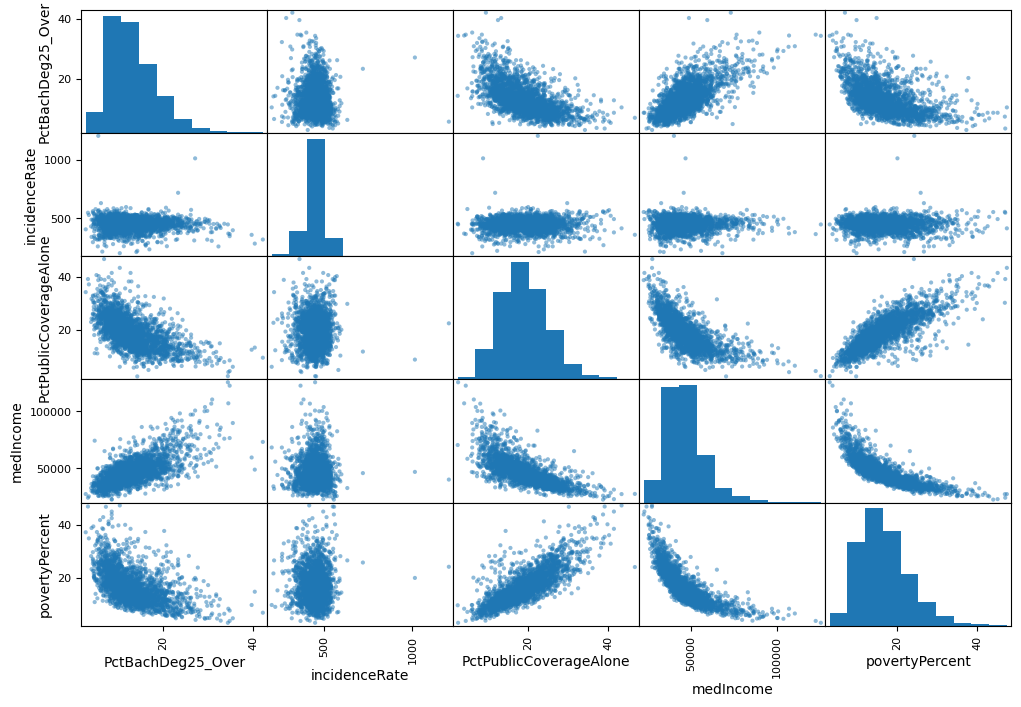

In [10]:
# Plot the top five features correlations with each other using a scatter matrix
from pandas.plotting import scatter_matrix

attr = top_five_features.index
scatter_matrix(cancer[attr], figsize=(12, 8))

### Correlation Observations:
- PctPublicCoverageAlone and poveryPercent have an obvious positive correlation - makes sense given private coverage is expensive
- medIncome and PctBachDeg25_Over have a positive correlation as well - degrees are expensive
- medIncome and PctPublicCoverageAlone have a negative correlation

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [11]:
# Import the necessary modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator

In [12]:
# Remove features with too many missing values
class RemoveFeatures(BaseEstimator):
    def __init__(self, threshold=0.1):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        missing_values = X.isnull().sum()
        missing_percentage = missing_values / X.shape[0]
        self.features_to_remove = missing_percentage[missing_percentage >= self.threshold].index
        return self

    def transform(self, X, y=None):
        return X.drop(self.features_to_remove, axis=1)

In [13]:
# Create a pipeline to preprocess the data
pipeline = Pipeline([
    ('remove_features', RemoveFeatures(threshold=0.1)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [14]:
# Split cancer dataframe into features and targets
cancer_features = cancer.drop('TARGET_deathRate', axis=1)
feature_names = cancer_features.columns
cancer_targets = cancer['TARGET_deathRate'].copy()

Remove median ages greater than 100 and replace with NaN - a median age greater than that is unrealistic

In [15]:
cancer_features = cancer_features.mask(cancer_features["MedianAge"] > 100)

In [16]:
# Apply the pipeline to the features
cancer_features_prepared = pipeline.fit_transform(cancer_features)

In [17]:
# Get the column names of the prepared features
feature_names_removed = pipeline.named_steps['remove_features'].features_to_remove
feature_names = cancer_features.columns.drop(feature_names_removed)

In [18]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_features_prepared, cancer_targets, test_size=0.2, random_state=random_seed)

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [19]:
# Import the necessary modules
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

## Ordinary Least Squares Regression

In [20]:
# Do linear (ols) regression
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

# Predict the targets for the test set
y_pred = ols.predict(X_test)

# Compare the predicted targets with the actual targets
ols_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Predicted vs. Actual targets for Linear Regression:", "\n", ols_comparison.sample(10,random_state=random_seed))

# Print the root mean squared error
lin_mse=mean_squared_error(y_test, y_pred)
lin_rmse=np.sqrt(lin_mse)

print("\nRoot Mean Squared Error for Linear Regression:", lin_rmse)


Predicted vs. Actual targets for Linear Regression: 
       Actual   Predicted
1259   185.8  189.436984
430    205.6  194.039247
789    166.8  164.836720
1338   195.2  186.646122
402    176.0  170.622248
1977   194.7  193.703917
632    169.4  175.357614
973    228.6  210.969035
93     128.3  152.427030
630    181.1  189.161393

Root Mean Squared Error for Linear Regression: 18.856089502787864


## Lasso Regression

### Visual Analysis
Use a range of alphas and examine with respect to the RMS Error of the Lasso Regression Model predictions to get a range
in which further analysis of alpha values can be made to get an optimum value

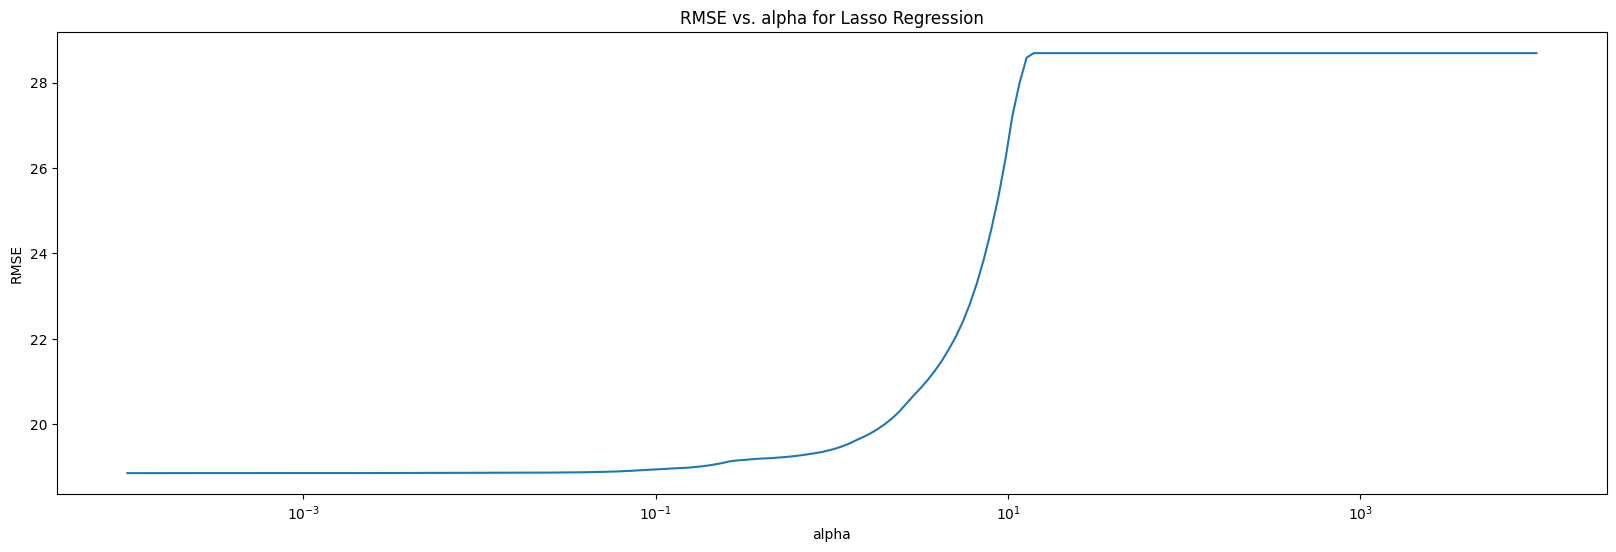

In [21]:
# Find the best alpha value for lasso regression model
lasso = linear_model.Lasso(random_state=random_seed)

errors = []
alphas = np.logspace(-4, 4, 200)

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    errors.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot the errors against the alpha values
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.axis('tight')
plt.title('RMSE vs. alpha for Lasso Regression')

plt.show()

### Grid Search
Use Grid Search Cross Validation with 5 cross validations and negative mean squared error scoring to evaluate 51 values of alpha between
1e-3 and 1e+3 and from that, get the best alpha value that minimises error

In [22]:
# Perform Grid Search to find the best alpha value for the lasso regression model
lasso = linear_model.Lasso(random_state=random_seed, max_iter=10000)
alphas = np.logspace(-5, 5, 51)
param_grid = {'alpha': list(alphas)}

lgrid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lgrid_search.fit(X_train, y_train)

# Print the best alpha value
print("Best alpha value for Lasso Regression:", lgrid_search.best_params_)

Best alpha value for Lasso Regression: {'alpha': 0.06309573444801936}


### Random Search
Use Random Search Cross Validation with 5 cross validations to find the best performing alpha value in the range 1e-3 and
1e+3, similar to Grid Search but randomly samples alpha values in a range to test rather than systematically and exhaustively
searching all combinations

In [23]:
# Perfom Random Search to find the best alpha value for the lasso regression model
lasso = linear_model.Lasso(random_state=random_seed, max_iter=10000)
param_grid = {'alpha': loguniform(1e-3, 1e3)}
n_iter_search = 51

lrand_search = RandomizedSearchCV(lasso, param_grid, n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error', random_state=random_seed)
lrand_search.fit(X_train, y_train)

# Print the best alpha value
print("Best alpha value for Lasso Regression:", lrand_search.best_params_)

Best alpha value for Lasso Regression: {'alpha': 0.066904211664988}


# Ridge Regression

### Visual Analysis
Use a range of alphas and examine with respect to the RMS Error of the Ridge Regression Model predictions to get a range
in which further analysis of alpha values can be made to get an optimum value

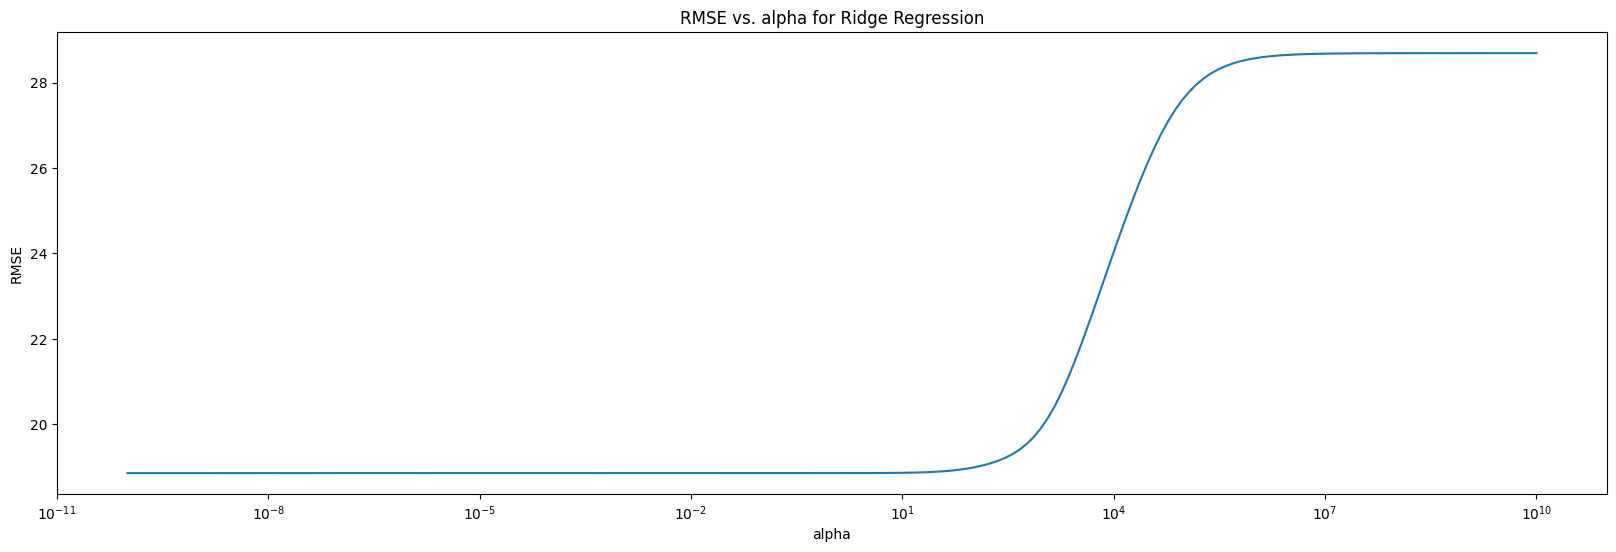

In [24]:
# Find the best alpha value for ridge regression model
ridge = linear_model.Ridge(random_state=random_seed)

errors = []
alphas = np.logspace(-10, 10, 200)

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    errors.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot the errors against the alpha values
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.axis('tight')
plt.title('RMSE vs. alpha for Ridge Regression')

plt.show()

### Grid Search
Use Grid Search Cross Validation with 5 cross validations and negative mean squared error scoring to evaluate 51 values of alpha between
1e-1 and 1e+6 and from that, get the best alpha value that minimises error

In [25]:
# Perform Grid Search to find the best alpha value for the ridge regression model
alphas = np.logspace(0, 6, 51)
param_grid = {'alpha': list(alphas)}

rgrid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
rgrid_search.fit(X_train, y_train)

# Print the best alpha value
print("Best alpha value for Ridge Regression:", rgrid_search.best_params_)

Best alpha value for Ridge Regression: {'alpha': 36.30780547701014}


### Random Search
Use Random Search Cross Validation with 5 cross validations to find the best performing alpha value in the range 1e-1 and
1e+6, similar to Grid Search but randomly samples alpha values in a range to test rather than systematically and exhaustively
searching all combinations

In [26]:
param_grid = {'alpha': loguniform(1e0, 1e6)}
n_iter_search = 51

rrand_search = RandomizedSearchCV(ridge, param_grid, n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error', random_state=random_seed)
rrand_search.fit(X_train, y_train)

# Print the best alpha value
print("Best alpha value for Ridge Regression:", rrand_search.best_params_)

Best alpha value for Ridge Regression: {'alpha': 35.70095960030949}


# Alpha Values:

### Lasso Regressor: 
- Use Alpha = 0.06
- Both RandomSearch and GridSearch gave values near 0.06 for alpha and looking at the visualisation, high accuracy with respect
to decimal points is not needed to such a degree (within orders of magintude seems to be sufficient)

In [27]:
# Lasso Regression with the best alpha value @ alpha=0.06
lasso = linear_model.Lasso(alpha=0.06)
lasso.fit(X_train, y_train)

# Make predictions using the test set
y_pred = lasso.predict(X_test)

# Get sample of the predictions
lasso_comp = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print("Predicted vs. Actual for Lasso Regression", "\n", lasso_comp.sample(10, random_state=random_seed))

# Print the root mean squared error
print("\nRoot Mean Squared Error: %.5f" % np.sqrt(mean_squared_error(y_test, y_pred)))

Predicted vs. Actual for Lasso Regression 
       Actual   Predicted
1259   185.8  189.353939
430    205.6  192.755172
789    166.8  164.764389
1338   195.2  184.665244
402    176.0  170.369820
1977   194.7  192.685034
632    169.4  176.204226
973    228.6  211.229015
93     128.3  151.956491
630    181.1  188.049031

Root Mean Squared Error: 18.89547


### Ridge Regressor:
- Use Alpha = 35
- Both RandomSearch and GridSearch gave optimised alpha values around 36, looking at the graph any alpha within the same order of magnitude seems to give similar errors so 35 was decided as the alpha value for ridge regression

In [28]:
# Ridge Regression with the best alpha value @ alpha=35
ridge = linear_model.Ridge(alpha=35)
ridge.fit(X_train, y_train)

# Make predictions using the test set
y_pred = ridge.predict(X_test)

# Get sample of the predictions
ridge_comp = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print("Predicted vs. Actual for Ridge Regression", "\n", ridge_comp.sample(10, random_state=random_seed))

# Print the root mean squared error
print("\nRoot Mean Squared Error: %.5f" % np.sqrt(mean_squared_error(y_test, y_pred)))

Predicted vs. Actual for Ridge Regression 
       Actual   Predicted
1259   185.8  189.094908
430    205.6  193.067447
789    166.8  164.598031
1338   195.2  184.384112
402    176.0  170.253181
1977   194.7  192.882635
632    169.4  176.172463
973    228.6  210.151351
93     128.3  152.379171
630    181.1  187.815830

Root Mean Squared Error: 18.89473


## Quantative Comparison of Models

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
# Function to display the cross validation scores
def display_scores(scores, method=""):
    print(method, "Scores:", scores)
    print(method, "Scores Mean:", scores.mean())
    print(method, "Scores Standard deviation:", scores.std())

In [31]:
# Perform cross validation on the linear regression model
# Get root mean squared error
ols_scores = cross_val_score(ols, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
ols_rmse_scores = np.sqrt(-ols_scores)
# Get r-squared values
ols_r2_scores = cross_val_score(ols, X_train, y_train, scoring="r2", cv=10)

# Display the cross validation scores
print("Linear Regression Model:")
display_scores(ols_rmse_scores, "RMSE")
display_scores(ols_r2_scores, "R2")

Linear Regression Model:
RMSE Scores: [20.15330052 20.88499094 20.24955084 17.4827493  18.23828307 21.59414796
 19.21863252 18.59068844 21.06379058 19.58966231]
RMSE Scores Mean: 19.70657964936018
RMSE Scores Standard deviation: 1.2604069810840406
R2 Scores: [0.32964307 0.29485727 0.4620008  0.51872934 0.54763171 0.41729539
 0.56261559 0.55117952 0.41622184 0.53127231]
R2 Scores Mean: 0.4631446830543438
R2 Scores Standard deviation: 0.09108360415685889


In [32]:
# Perform cross validation on the lasso regression model
# Get root mean squared error
lasso_scores = cross_val_score(lasso, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
# Get R-squared value
lasso_r2_scores = cross_val_score(lasso, X_train, y_train, scoring="r2", cv=10)

print("Lasso Regression Model:")
display_scores(lasso_rmse_scores, method="RMSE")
display_scores(lasso_r2_scores, method="R2")

Lasso Regression Model:
RMSE Scores: [19.98302332 20.63296329 20.39279116 17.42939363 18.29112683 21.4380719
 19.09612972 18.62714843 21.24395825 19.48688248]
RMSE Scores Mean: 19.66214890065879
RMSE Scores Standard deviation: 1.245894139228352
R2 Scores: [0.34092304 0.31177307 0.45436253 0.52166244 0.54500652 0.42568818
 0.56817374 0.54941734 0.40619252 0.53617789]
R2 Scores Mean: 0.46593772737133693
R2 Scores Standard deviation: 0.08742468764675988


In [33]:
# Perform cross validation on the ridge regression model
# Get root mean squared error
ridge_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
# Get R-squared value
ridge_r2_scores = cross_val_score(ridge, X_train, y_train, scoring="r2", cv=10)

print("Ridge Regression Model:")
display_scores(ridge_rmse_scores, method="RMSE")
display_scores(ridge_r2_scores, method="R2")

Ridge Regression Model:
RMSE Scores: [19.94084906 20.62197799 20.47198012 17.41094184 18.23887694 21.34784531
 19.19734651 18.65948731 21.23416456 19.43287102]
RMSE Scores Mean: 19.655634065264824
RMSE Scores Standard deviation: 1.2383347555938244
R2 Scores: [0.34370208 0.31250572 0.45011668 0.5226747  0.54760225 0.43051223
 0.56358392 0.54785146 0.4067399  0.53874546]
R2 Scores Mean: 0.4664034387145133
R2 Scores Standard deviation: 0.08655876780412505


### Discussion:

- Looking at the cross validation of the ols, lasso and ridge regression models they seem to be performing similarily with
only marginal differences between both RMSE and R-squared values

<center>

| Regression Model | Evaluation Method | Scores Mean | Scores Sandard Deviation |
| ---------------- | ----------------- | ----------- | ------------------------ |
| OLS | RMSE | 19.707 | 1.2604 |
| Lasso | RMSE | 19.662 | 1.2459 |
| Ridge | RMSE | 19.656 | 1.2393 |
| OLS | R2 | 0.4631 | 0.0911 |
| Lasso | R2 | 0.4659 | 0.0874 |
| Ridge | R2 | 0.4663 | 0.0869 |

</center>

- Ridge has the lowest RMS Error and Standard Deviation meaning it performs most consistently with minimal error compared to the other models
- Ridge also has the greatest R-Squared Score and Standard Deviation meaning meaning that it fits the data the most compared to the other models in may therefore be better though the value of around 0.466 is not the best r-squared score - there is at least 50% of the data the model isn't fit to

Conclusion: Ridge Regression is the best linear model for the task

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [34]:
# Lasso Regression with the best alpha value @ alpha=0.06
lasso = linear_model.Lasso(alpha=0.06)
lasso.fit(X_train, y_train)

Lasso(alpha=0.06)

In [35]:
# Get the coefficients
lasso_coef = lasso.coef_
# Get the importantce of the features
lasso_importance = np.abs(lasso_coef)

In [36]:
# Get the feature names
feature_importance = zip(feature_names, lasso_importance)
top_five_features = sorted(feature_importance, key=lambda x: -x[1])[:5]
for feature, importance in top_five_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: incidenceRate, Importance: 10.303600723920578
Feature: PctBachDeg25_Over, Importance: 7.371967824861624
Feature: PctMarriedHouseholds, Importance: 6.307024113599535
Feature: avgDeathsPerYear, Importance: 5.8512269407230395
Feature: PercentMarried, Importance: 5.802132877214767


## Five most important/relevant features in decending importance:
1) incidenceRate
2) PctBachDeg25_Over
3) PctMarriedHouseholds
4) avgDeathsPerYear
5) PercentMarried

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

## Untuned Random Forest Regression

In [37]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Create a random forest regressor
forest_reg = RandomForestRegressor(random_state=random_seed)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Predict the test set
y_pred = forest_reg.predict(X_test)

In [40]:
# Get parameters of the random forest regressor
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [41]:
# Get sample of the predictions
forest_comp = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print("Predicted vs. Actual for Random Forest Regression", "\n", forest_comp.sample(10, random_state=random_seed))

# Get the root mean squared error
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
print("\nRoot Mean Squared Error: %.5f" % forest_rmse)

Predicted vs. Actual for Random Forest Regression 
       Actual  Predicted
1259   185.8    186.144
430    205.6    189.597
789    166.8    175.658
1338   195.2    183.143
402    176.0    169.081
1977   194.7    195.041
632    169.4    171.143
973    228.6    221.464
93     128.3    156.020
630    181.1    182.185

Root Mean Squared Error: 19.89404


In [42]:
# Cross validation on the random forest model
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_r2_scores = cross_val_score(forest_reg, X_train, y_train, scoring="r2", cv=10)

print("Random Forest Regression Model:")
display_scores(forest_rmse_scores, method="RMSE")
display_scores(forest_r2_scores, method="R2")

Random Forest Regression Model:
RMSE Scores: [19.06544459 20.07663675 20.5412645  16.58024571 18.37361268 19.7407349
 19.93637438 17.69641858 19.03652826 18.37092521]
RMSE Scores Mean: 18.941818555054816
RMSE Scores Standard deviation: 1.1521512973850905
R2 Scores: [0.40006029 0.34838605 0.44638838 0.56713562 0.54089358 0.51302917
 0.52933631 0.59332031 0.52318459 0.58778027]
R2 Scores Mean: 0.5049514573082512
R2 Scores Standard deviation: 0.07730796030734179


### Discussion:
- Random Forest is giving an RMSE Score Mean of 19.003 and an R2 Score Mean of 0.5013 which is better than the the ridge values of RMSE mean = 19.656 and R2 mean = 0.4663

## Tuning Random Forest Regression

Using Randomised Search as more suitable when parameter space is large - GridSearchCV takes too long. A wide range of values is preferable.

In [43]:
# Create parameter grid for random search cross validation on random forest model
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [25, 35, 50, 100, 200], 'max_features': [4, 8, 12, 24, 48], 'max_depth': [2, 4, 6, 8, 10, 12, 14], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]}
]

# Create a random forest regressor
forest_reg = RandomForestRegressor(random_state=random_seed)

# Create a random search cross validation
random_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', random_state=random_seed)

# Fit the model
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                         'max_features': [4, 8, 12, 24, 48],
                                         'min_samples_leaf': [2, 4, 6, 8, 10,
                                                              12, 14],
                                         'min_samples_split': [2, 4, 6, 8, 10,
                                                               12, 14],
                                         'n_estimators': [25, 35, 50, 100,
                                                          200]}],
                   random_state=42, scoring='neg_mean_squared_error')

In [44]:
# Get the best parameters
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 8,
 'max_depth': 10,
 'bootstrap': False}

### Discussion:
- n_estimators is 200, it was found that cross validaton will always provide an increase in n_estimators as the best parameter value however having too many descision trees in the random forest can lead to overfitting or extreme increases in training time
- min_samples_split, the number of splits required before an internal node (has children) can split further, is 14. The higher the value, the less complexity of the descision trees in the random forest - this reduces overfitting at the cost of accuracy
- min_samples_leaf, the minimum number of samples required to be a leaf node, again controls the complexity of the trees - while it is reccomended to have a value around 10 for this parameter to avoid overfitting, but the use of 2 in this case may offset the protection against overfitting provided by other hyper-parameters
- max_features being at 8 will mean the maximum number of features to be considered when splitting a node is 8 - this means that only 8 columns of data are considered in the predicition. While lower values are preferable to avoid overfitting, perhaps due to the small importance given to each feature (seen in a later section) and each feature therefore having less of an affect the model can get away with using more features in prediction
- max_depth is how deep the decision trees will go - having a cut off at 10 aims to avoid overfitting while still maintaining the accuracy of the model
- bootstrapping means that each descision tree in the random forest is trained on different data so by making it false, the descision trees are trained on the entirety of the dataset and are therefore more accurate though there is increased risk of overfitting, again linking back to the importance of each feature - such measures need to be taken to have a reasonable prediction model as otherwise the model would perform more poorly

## Ridge vs. Random Forest

In [45]:
# Create Random Forest Regressor with the best parameters
forest_reg = RandomForestRegressor(bootstrap=False, max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=14, n_estimators=200)

# Fit the model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features=8,
                      min_samples_leaf=2, min_samples_split=14,
                      n_estimators=200)

In [46]:
# Predict the test set
y_pred = forest_reg.predict(X_test)

In [47]:
# Get sample of the predictions

print("Predicted vs. Actual for Random Forest Regression", "\n", forest_comp.sample(10, random_state=random_seed))

# Get the root mean squared error
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
print("\nRoot Mean Squared Error: %.5f" % forest_rmse)

Predicted vs. Actual for Random Forest Regression 
       Actual  Predicted
1259   185.8    186.144
430    205.6    189.597
789    166.8    175.658
1338   195.2    183.143
402    176.0    169.081
1977   194.7    195.041
632    169.4    171.143
973    228.6    221.464
93     128.3    156.020
630    181.1    182.185

Root Mean Squared Error: 19.83389


In [48]:
# Cross validation on the random forest model
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_r2_scores = cross_val_score(forest_reg, X_train, y_train, scoring="r2", cv=10)

print("Random Forest Regression Model:")
display_scores(forest_rmse_scores, method="RMSE")
display_scores(forest_r2_scores, method="R2")

Random Forest Regression Model:
RMSE Scores: [18.27951579 19.62610916 20.77558884 16.29081611 18.21130471 19.84810242
 19.7295824  18.35581159 19.2872612  18.69095861]
RMSE Scores Mean: 18.909505083080386
RMSE Scores Standard deviation: 1.1742326290289233
R2 Scores: [0.44731585 0.37379765 0.43213948 0.58182078 0.5516962  0.49523606
 0.54172545 0.56774574 0.51043782 0.57192914]
R2 Scores Mean: 0.5073844158271055
R2 Scores Standard deviation: 0.06615548945985536


### Discussion:
- When working without cross-validation the Random Forest has a greater RMS Error than the Ridge Model (previously identified as the best performing linear model)
- In Cross validation, the Random Forest performs better with a lower RMSE Mean Score and also a greater R-squared score

## Top Five Features - Random Forest

In [49]:
# Random Forest with the best parameters
forest_reg = RandomForestRegressor(bootstrap=False, max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=14, n_estimators=200, random_state=random_seed)
forest_reg.fit(X_train, y_train)

# Get the coefficients
forest_coefficients = forest_reg.feature_importances_
forest_importance = np.abs(forest_coefficients)

# Get the feature names
feature_importance = zip(feature_names, forest_importance)
top_five_features = sorted(feature_importance, key=lambda x: -x[1])[:5]
for feature, importance in top_five_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: incidenceRate, Importance: 0.17450460694368244
Feature: PctBachDeg25_Over, Importance: 0.13151954004721703
Feature: PctPublicCoverageAlone, Importance: 0.09971423311283677
Feature: medIncome, Importance: 0.06355203296487434
Feature: PctHS25_Over, Importance: 0.061529827956923425


### Discussion:

For Random Forest Regression:

| Feature | Importance |
| ------- | ---------- |
| incidenceRate | 0.1789668390361081 |
| PctBachDeg25_Over | 0.1307444205069849 |
| PctPublicCoverageAlone | 0.08478752090585599 |
| PctHS25_Over | 0.06245192733576898 |
| medIncome | 0.059982454955236054 |

For Lasso Regression:

| Feature | Importance |
| ------- | ---------- |
| incidenceRate | 10.303600723920578 |
| PctBachDeg25_Over | 7.371967824861624 |
| PctMarriedHouseholds | 6.307024113599535 |
| avgDeathsPerYear | 5.8512269407230395 |
| PercentMarried | 5.802132877214767 |

- Different Features are more important though incidenceRate and PctBachDeg25_Over remain the most important for both models
- The Random Forest finds each of the variables to be much less important than Lasso which may mean that the random forest is less succeptable to extraneous extreme values and therefore better performing when provided with unseen data

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [50]:
# Import the necessary libraries
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

random_seed = 42

In [51]:
## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

## Read in the provided training data and targets
training_data = pd.read_csv(training_data_path)
training_targets = pd.read_csv(training_targets_path)

In [52]:
# Define custom transformer to remove features with missing values greater than a threshold
class RemoveFeatures(BaseEstimator):
    def __init__(self, threshold=0.1):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        missing_values = X.isnull().sum()
        missing_percentage = missing_values / X.shape[0]
        self.features_to_remove = missing_percentage[missing_percentage >= self.threshold].index
        return self

    def transform(self, X, y=None):
        return X.drop(self.features_to_remove, axis=1)

# Define Pipeline
pipeline = Pipeline([
    ('remove_features', RemoveFeatures(threshold=0.1)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [53]:
# Remove extraneous features from the training data
training_data = training_data.mask(training_data["MedianAge"] > 100)

# Preprocess the training data
X_train = pipeline.fit_transform(training_data)

# Prepare the training targets
y_train = np.array(training_targets)
y_train = y_train.ravel()

In [54]:
## Define paths to the test data and targets files
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'

## Read in the provided test data and targets
test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions

# Preprocess the test data
X_test = pipeline.transform(test_data)

# Prepare the test targets
y_test = np.array(test_targets)
y_test = y_test.ravel()

# Create a random forest regressor with the best parameters identified in the previous section
forest_reg = RandomForestRegressor(bootstrap=False, max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=14, n_estimators=200, random_state=random_seed)

# Fit the model
forest_reg.fit(X_train, y_train)

# Predict the test set
y_pred = forest_reg.predict(X_test)

In [55]:
# Get sample of the predictions
forest_comp = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print("Predicted vs. Actual for Random Forest Regression", "\n", forest_comp.sample(10, random_state=random_seed))

# Get the root mean squared error
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
print("\nRoot Mean Squared Error: %.5f" % forest_rmse)

Predicted vs. Actual for Random Forest Regression 
      Predicted  Actual
27  178.581737   186.5
15  158.942940   146.4
23  147.538807   155.8
17  203.358396   159.8
8   181.927614   172.8
9   199.806697   164.9
28  159.248105   222.4
24  186.848396   191.2
12  115.233632   136.9
0   180.674235   181.2

Root Mean Squared Error: 20.57799
